<a href="https://colab.research.google.com/github/alangaurav/DAV15714/blob/master/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Trees
- This week's decision trees focus solely on using sklearn's algorithms.
  - Sklearn uses the CART method for both classification and regression methods.
- This notebook has two sections
  - Classification based algorithms
  - Regression based algorithms
  

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, precision_recall_curve, roc_curve, roc_auc_score, mean_squared_log_error, r2_score
from sklearn.preprocessing import OneHotEncoder

### Classification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregNo    768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
                0       1        2       3        4
pregNo      6.000   1.000    8.000   1.000    0.000
glucose   148.000  85.000  183.000  89.000  137.000
bp         72.000  66.000   64.000  66.000   40.000
skin       35.000  29.000    0.000  23.000   35.000
insulin     0.000   0.000    0.000  94.000  168.000
bmi        33.600  26.600   23.300  28.100   43.100
pedigree    0.627   0.351    0.672   0.167    2

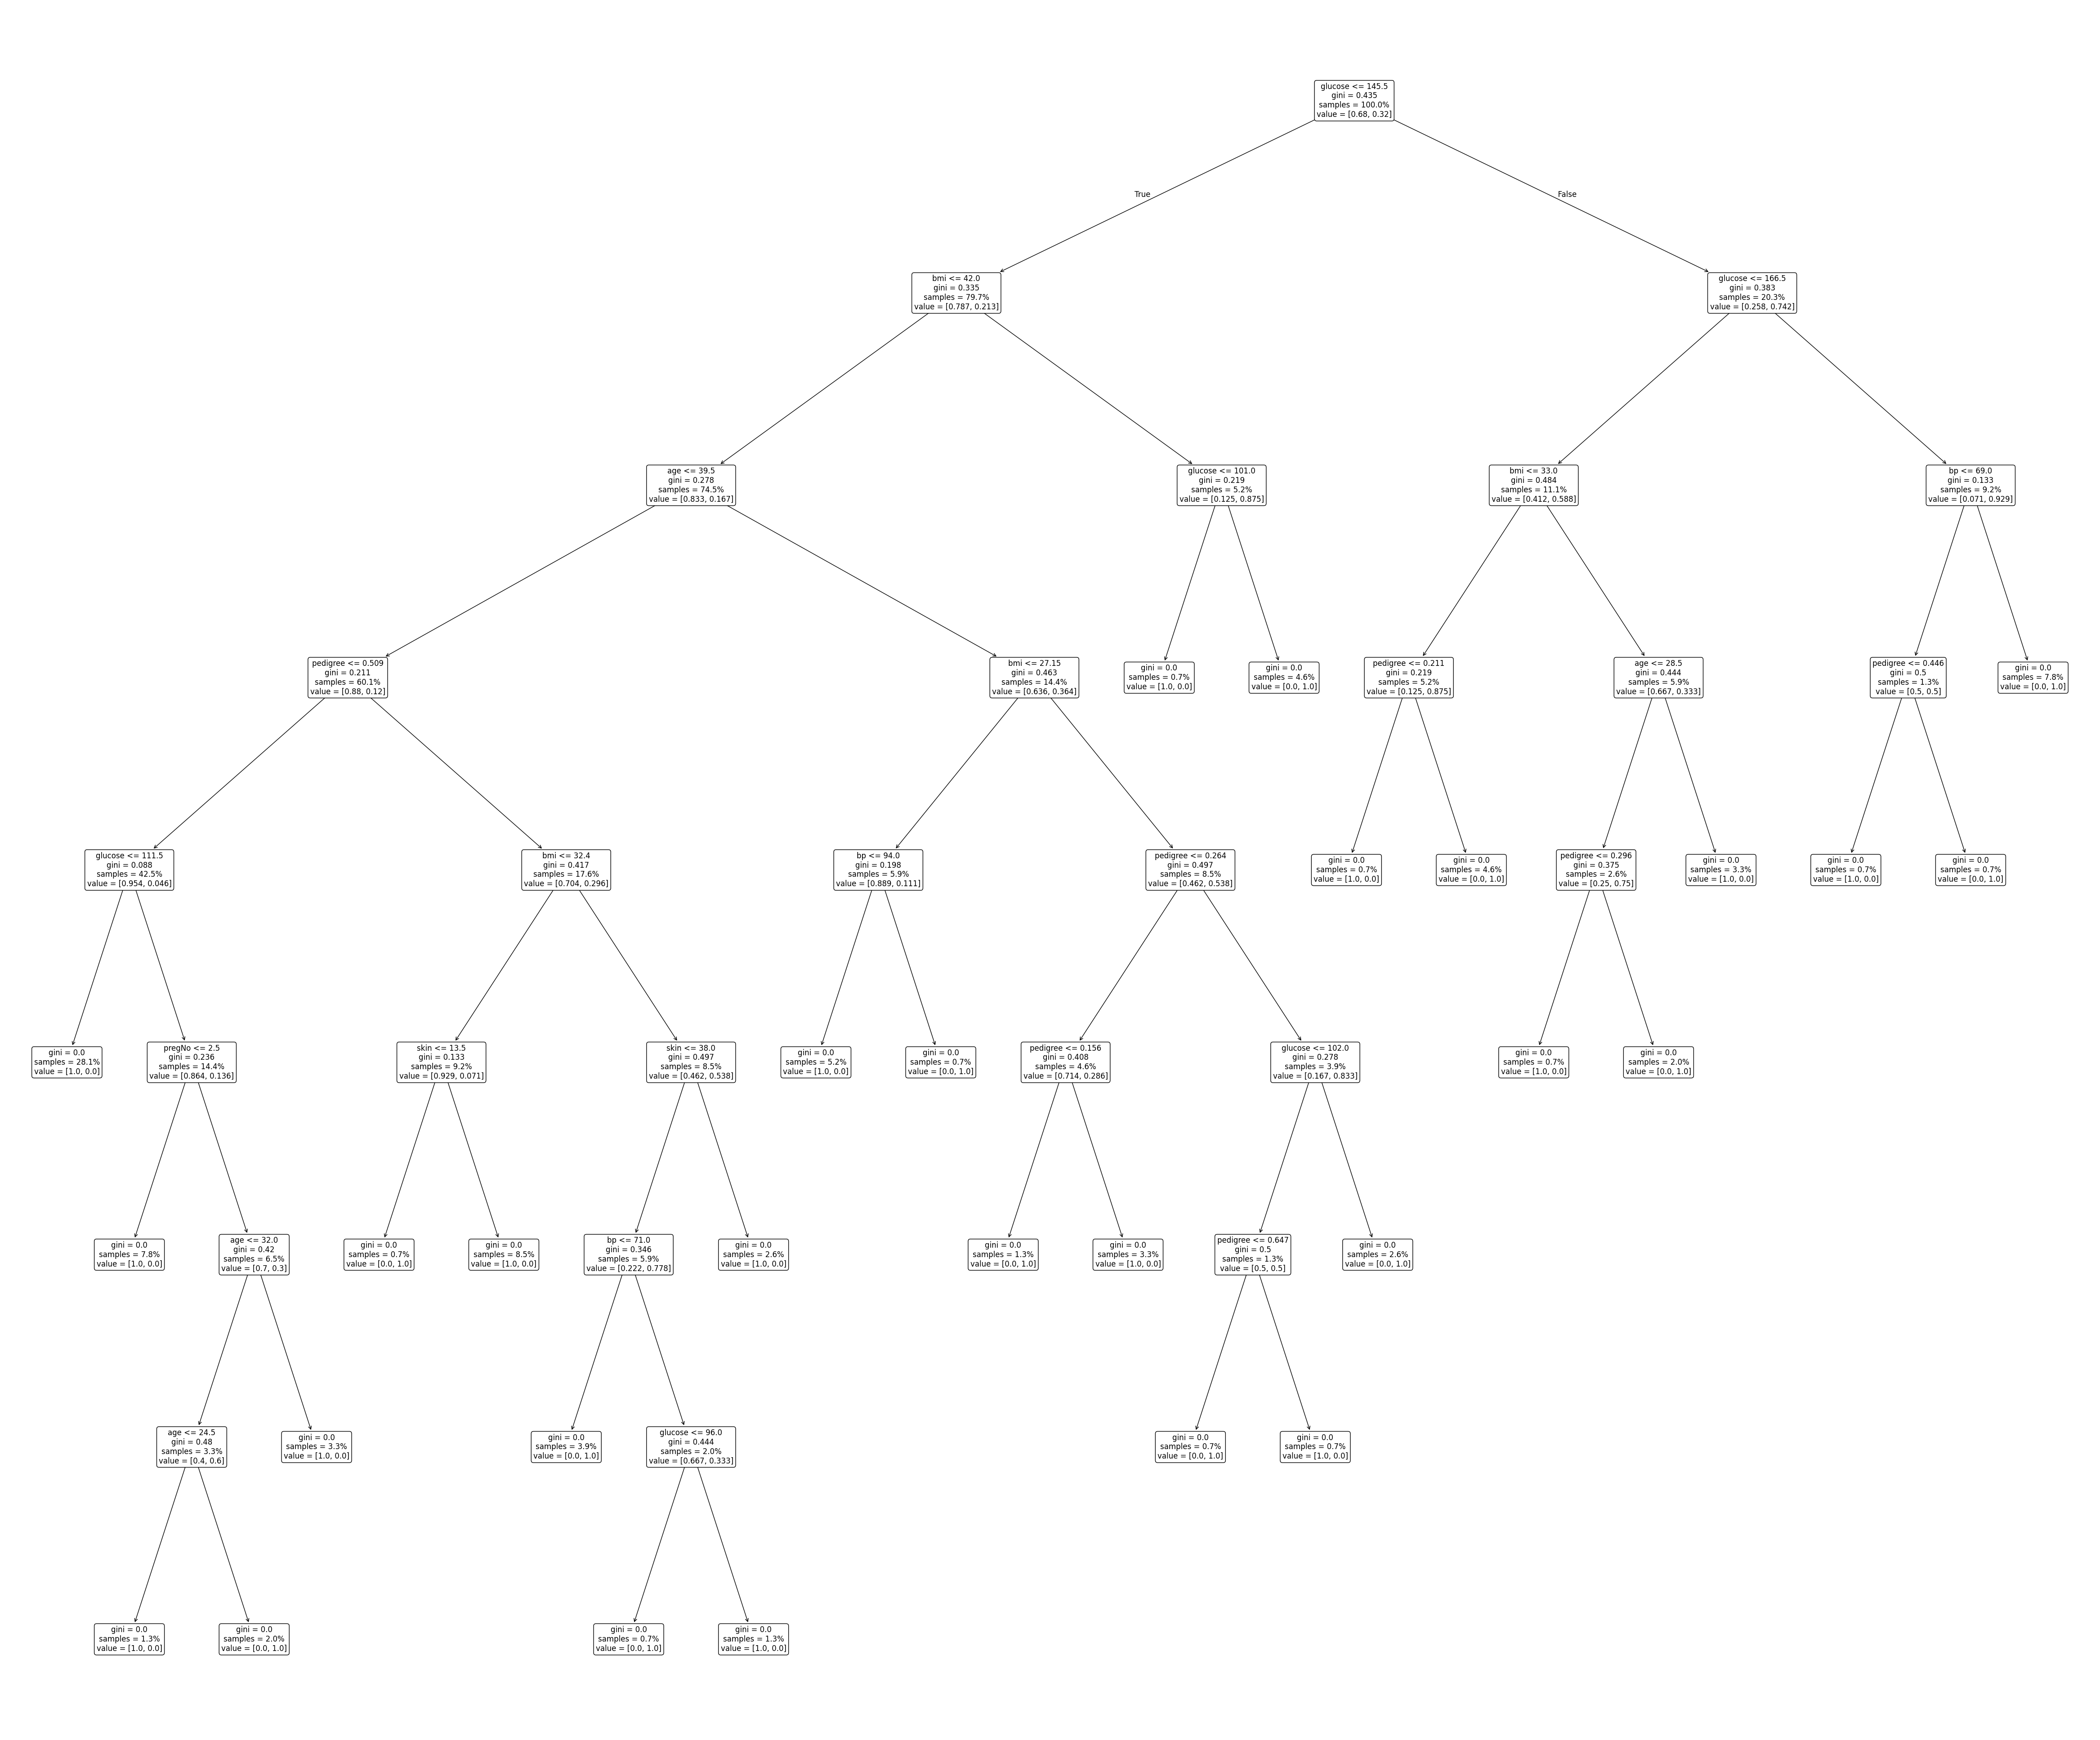

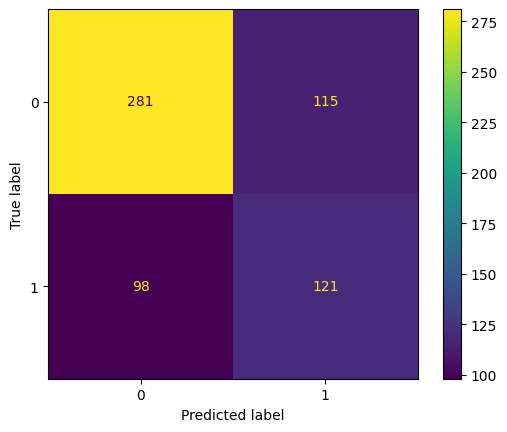

In [2]:
# Use the diabetes dataset for classification
# Target variable: class - is diabetic or not

diabetes = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Five/data/pima-indians-diabetes.csv')
print(diabetes.info())
print(diabetes.head().T)

X = diabetes.drop('class', axis=1)
y = diabetes['class']

# No clean/transform of data required as all the data is numeric and no nulls
# random_state = 0 === np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)
f1 = f1_score(y_test, model.predict(X_test))
prec = precision_score(y_test, model.predict(X_test))
print(f'F1: {f1}\nPrecision:{prec}')

fg, ax = plt.subplots(figsize=(60, 50))
dt = plot_tree(model, feature_names=diabetes.drop('class', axis=1).columns ,impurity=True, proportion=True, rounded=True, fontsize=12)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)))
cm.plot()
plt.show()

### Regression

In [3]:
# This is a very small dataset so regression metrics are not the best
salary = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Five/data/position_salaries.csv')
salary.head().T
salary.info()

X = salary[['Level', 'Position']]
enc = OneHotEncoder()
X = enc.fit_transform(X)
y = salary['Salary']

X_train, X_test, y_train, y_test = X[:7], X[7:], y[:7], y[7:]

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

score = model.score(X_test, y_test)
r2 = r2_score(y_test, y_preds)
msle = mean_squared_log_error(y_test, y_preds)

print(f'Score: {score}\nR2: {r2}\nMSLE: {msle}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes
Score: -3.5541346153846156
R2: -3.5541346153846156
MSLE: 6.337914034086712
